In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import geopandas as gpd

In [9]:
# Load
# chunksize = 10**3
# with pd.read_csv("Matrices-OD/viajes202208.csv", sep=";",encoding='iso-8859-1', chunksize=chunksize) as reader:
#     viajes_sample = reader.get_chunk(chunksize)
# viajes_sample.head()

In [10]:
# !head Matrices-OD/viajes*.csv -q -n 10001 > test.csv
# !head test.csv -q -n 1000 > viajes_small.csv
# !ftfy -e latin-1 test.csv > test-fixed.csv

In [15]:

with open('viajes.csv',encoding='utf-16', errors = 'backslashreplace') as f:
    viajes_sample = pd.read_csv(f, sep=';', low_memory=False)
viajes_sample.head()
#viajes_sample.dropna(subset = ['tiempobajada_1era'])['tiempobajada_1era'].head()
#viajes_sample.dropna(subset = ['mediahora'])['mediahora'].head()
#viajes_sample['med']
#pd.unique(sample['netapas'])
#viajes_sample['tviaje_seg'].dtype

,nviaje,netapa,etapas,netapassinbajada,ultimaetapaconbajada,tviaje_seg,tviaje_min,dviajeeuclidiana_mts,dviajeenruta_mts,paraderosubida,...,tipotransporte_4ta,tespera_1era,tespera_2da,tespera_3era,tespera_4ta,escolar,tviaje_en_vehiculo_min,tipo_corte_etapa_viaje,proposito,dviajeenbus
0,1,1,NaN,1,0,NaN,NaN,NaN,NaN,EL PARRON,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,MS_M_M,SINBAJADA,NaN
1,1,1,NaN,1,0,NaN,NaN,NaN,NaN,L-13-31-45-OP,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,UE,SINBAJADA,NaN
2,1,1,NaN,1,0,NaN,NaN,NaN,NaN,T-18-156-PO-37,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,UE,SINBAJADA,NaN
3,1,1,NaN,1,0,NaN,NaN,NaN,NaN,L-13-56-5-SN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,UE,SINBAJADA,NaN
4,1,1,NaN,1,0,NaN,NaN,NaN,NaN,UNIVERSIDAD DE SANTIAGO,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,UE,SINBAJADA,NaN


In [16]:
# chunksize = 10**4
# with open('viajes.csv',encoding='utf-16', errors = 'backslashreplace') as f:
#     with pd.read_csv(f, sep=";", chunksize=chunksize) as reader:
#         etapas_sample = reader.get_chunk(chunksize)
#     viajes_sample = pd.read_csv(f, sep=';', low_memory=False)
# viajes_sample.head()



In [17]:
pd.unique(viajes_sample['nviaje'])

array([ 1,  2,  3,  8,  6,  7,  5,  4,  9, 10, 11])

In [18]:
viajes_sample.shape

(99999, 103)

In [2]:
# Load
# iso-8859-1
chunksize = 10**4
with open("Matrices-OD/etapas202208.csv",encoding='iso-8859-1', errors = 'backslashreplace') as f:
    with pd.read_csv(f, sep=";", chunksize=chunksize) as reader:
        etapas_sample = reader.get_chunk(chunksize)
etapas_sample.head()

,op,netapa,tipo_dia,tipo_transporte,f_exp_servicioperiodots,tiene_bajada,tiempo2,tiempo_subida,tiempo_bajada,tiempo_etapa,...,comuna_subida,comuna_bajada,zona_subida,zona_bajada,sitio_subida,fexpansionzonaperiodots,tesperamediaintervalo,periodosubida,periodobajada,tiempoiniexpedicion
0,6,2,LABORAL,ZP,1.5277,1,2022-08-12 07:41:18.000,2022-08-12 07:41:07.000,2022-08-12 07:48:59.000,461.0,...,LAS CONDES,LAS CONDES,222.0,218.0,WA-9787,1.3223,0.1833,004 - PUNTA MAÃANA,004 - PUNTA MAÃANA,2022-08-12 06:00:48
1,6,1,LABORAL,BUS,1.0693,1,2022-08-12 18:26:32.000,2022-08-12 18:26:32.000,2022-08-12 18:37:41.000,669.0,...,LAS CONDES,LAS CONDES,210.0,207.0,CJRK-78,1.1608,0.5667,009 - PUNTA TARDE 1,010 - PUNTA TARDE 2,2022-08-12 18:08:10
2,1,2,LABORAL,METRO,1.0000,0,2022-08-12 18:41:56.000,2022-08-12 18:41:56.000,NaN,NaN,...,LAS CONDES,NaN,213.0,NaN,Manquehue - L1,NaN,NaN,010 - PUNTA TARDE 2,NaN,2010-01-00 -
3,1,1,LABORAL,METRO,1.0000,1,2022-08-12 18:42:01.000,2022-08-12 18:42:01.000,2022-08-12 19:11:34.000,1773.0,...,LAS CONDES,SANTIAGO,213.0,295.0,Manquehue - L1,1.2832,NaN,010 - PUNTA TARDE 2,010 - PUNTA TARDE 2,2010-01-00 -
4,1,1,LABORAL,METRO,1.0000,0,2022-08-12 17:38:52.000,2022-08-12 17:38:52.000,NaN,NaN,...,LA CISTERNA,NaN,380.0,NaN,La Cisterna L2,NaN,NaN,009 - PUNTA TARDE 1,NaN,2010-01-00 -


In [20]:
etapas_sample.columns

Index(['op', 'netapa', 'tipo_dia', 'tipo_transporte',
       'f_exp_servicioperiodots', 'tiene_bajada', 'tiempo2', 'tiempo_subida',
       'tiempo_bajada', 'tiempo_etapa', 'mh_subida', 'mh_bajada', 'x_subida',
       'y_subida', 'x_bajada', 'y_bajada', 'dist_ruta_paraderos',
       'dist_eucl_paraderos', 'servicio_subida', 'servicio_bajada',
       'par_subida', 'par_bajada', 'comuna_subida', 'comuna_bajada',
       'zona_subida', 'zona_bajada', 'sitio_subida', 'fexpansionzonaperiodots',
       'tesperamediaintervalo', 'periodosubida', 'periodobajada',
       'tiempoiniexpedicion'],
      dtype='object')

In [6]:
etapas_sample['op'].unique()

array([ 6,  1,  5,  3,  4,  2, 17,  7])

In [21]:
comunas = gpd.read_file('aves/data/external/censo_2017_R13/COMUNA_C17.shp')
comunas.head()

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,SHAPE_Leng,SHAPE_Area,geometry
0,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13404,PAINE,1.625330,0.066035,"POLYGON ((-70.61889 -33.73808, -70.61811 -33.7..."
1,13,REGIÓN METROPOLITANA DE SANTIAGO,134,MAIPO,13402,BUIN,0.884164,0.021166,"POLYGON ((-70.63192 -33.64634, -70.63207 -33.6..."
2,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13124,PUDAHUEL,0.720176,0.019124,"POLYGON ((-70.78914 -33.36153, -70.78824 -33.3..."
3,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13103,CERRO NAVIA,0.170180,0.001076,"POLYGON ((-70.71927 -33.41334, -70.71888 -33.4..."
4,13,REGIÓN METROPOLITANA DE SANTIAGO,133,CHACABUCO,13301,COLINA,1.692007,0.093820,"POLYGON ((-70.59630 -32.95138, -70.59673 -32.9..."


In [22]:
zones = gpd.read_file('./Matrices-OD/Zonas777-04-04-2014/Shape/Zonas777_V07_04_2014.shp')
zones.head()

,geometry
0,"POLYGON ((-70.75950 -33.41237, -70.76014 -33.4..."
1,"POLYGON ((-70.73929 -33.38999, -70.73667 -33.3..."
2,"POLYGON ((-70.54357 -33.54802, -70.54293 -33.5..."
3,"POLYGON ((-70.54357 -33.54802, -70.54519 -33.5..."
4,"POLYGON ((-70.78731 -33.56483, -70.79797 -33.5..."


In [23]:
zones.shape

(804, 1)

<Axes: >

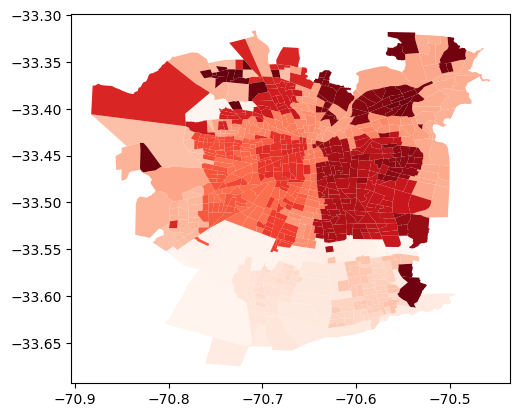

In [24]:
f, ax = plt.subplots()
#comunas_santiago = comunas[comunas['NOM_COMUNA'].isin(pd.unique(viajes_with_comunas['comunasubida'])]
#comunas.plot(ax=ax)
zones.plot(ax=ax, cmap='Reds')
#comunas.plot(ax=ax, colormap='Transparent')

In [25]:
#viajes_with_zones = viajes_sample.join(comunas, on='')
viajes_sample['comunasubida']
viajes_with_comunas = viajes_sample.dropna(subset=['tviaje_min']).merge(comunas[['NOM_COMUNA', 'geometry']], left_on='comunasubida', right_on='NOM_COMUNA')
#viajes_with_zones = (comunas[['COMUNA', 'geometry']]).merge(viajes_sample, left_on='COMUNA', right_on='comunasubida')
viajes_with_comunas = gpd.GeoDataFrame(viajes_with_comunas)
viajes_with_comunas.head()

,nviaje,netapa,etapas,netapassinbajada,ultimaetapaconbajada,tviaje_seg,tviaje_min,dviajeeuclidiana_mts,dviajeenruta_mts,paraderosubida,...,tespera_2da,tespera_3era,tespera_4ta,escolar,tviaje_en_vehiculo_min,tipo_corte_etapa_viaje,proposito,dviajeenbus,NOM_COMUNA,geometry
0,2,1,NaN,0,1,1300.0,21.666667,6561.8003,7130.0,TOBALABA,...,NaN,NaN,NaN,NaN,21.6667,UE,HOGAR,NaN,PROVIDENCIA,"POLYGON ((-70.60649 -33.40918, -70.60649 -33.4..."
1,2,1,NaN,0,1,1300.0,21.666667,6561.8003,7130.0,TOBALABA,...,NaN,NaN,NaN,NaN,21.6667,SM2H,TRABAJO,NaN,PROVIDENCIA,"POLYGON ((-70.60649 -33.40918, -70.60649 -33.4..."
2,3,1,NaN,0,1,1210.0,20.166667,5863.5923,7312.0,TOBALABA,...,NaN,NaN,NaN,NaN,20.1667,UE,HOGAR,NaN,PROVIDENCIA,"POLYGON ((-70.60649 -33.40918, -70.60649 -33.4..."
3,3,1,NaN,0,1,1086.0,18.100000,6081.8555,6894.0,TOBALABA,...,NaN,NaN,NaN,NaN,18.1000,M3B,OTROS,NaN,PROVIDENCIA,"POLYGON ((-70.60649 -33.40918, -70.60649 -33.4..."
4,2,1,NaN,0,1,1086.0,18.100000,6081.8555,6894.0,TOBALABA,...,NaN,NaN,NaN,NaN,18.1000,UE,HOGAR,NaN,PROVIDENCIA,"POLYGON ((-70.60649 -33.40918, -70.60649 -33.4..."


In [26]:
zones.shape

(804, 1)

<Axes: >

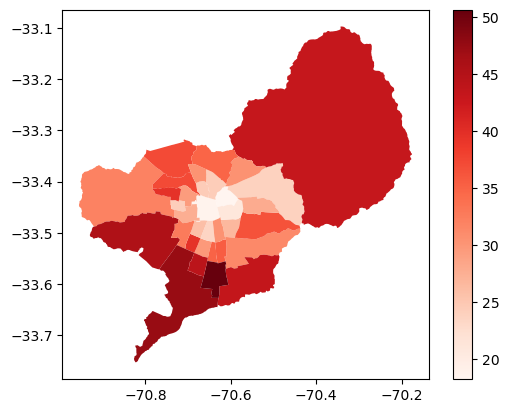

In [27]:
(viajes_with_comunas[viajes_with_comunas['proposito'] == 'TRABAJO']
 [['tviaje_min', 'NOM_COMUNA', 'geometry']].groupby(['NOM_COMUNA', 'geometry'], sort=False).mean()
 .reset_index()
 .plot('tviaje_min', cmap='Reds', legend=True)
 )

<Axes: >

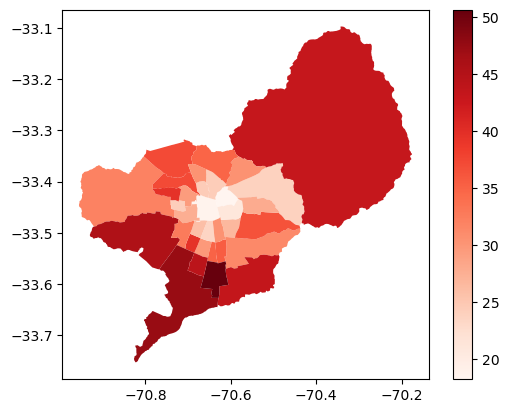

In [28]:
(viajes_with_comunas[viajes_with_comunas['proposito'] == 'TRABAJO']
 [['tviaje_min', 'NOM_COMUNA', 'geometry']].groupby(['NOM_COMUNA', 'geometry'], sort=False).mean()
 .reset_index()
 .plot('tviaje_min', cmap='Reds', legend=True)
 )

<Axes: >

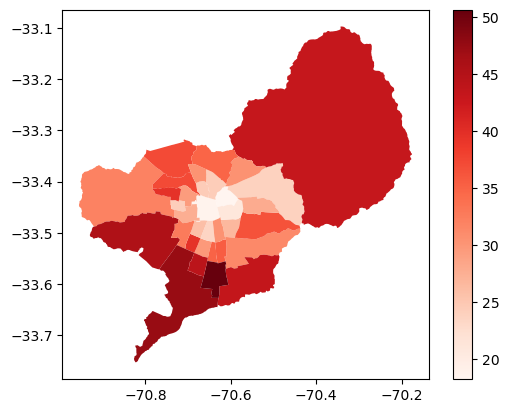

In [29]:
(viajes_with_comunas[viajes_with_comunas['proposito'] == 'TRABAJO']
 [['tviaje_min', 'NOM_COMUNA', 'geometry']].groupby(['NOM_COMUNA', 'geometry'], sort=False).mean()
 .reset_index()
 .plot('tviaje_min', cmap='Reds', legend=True)
 )

<Axes: >

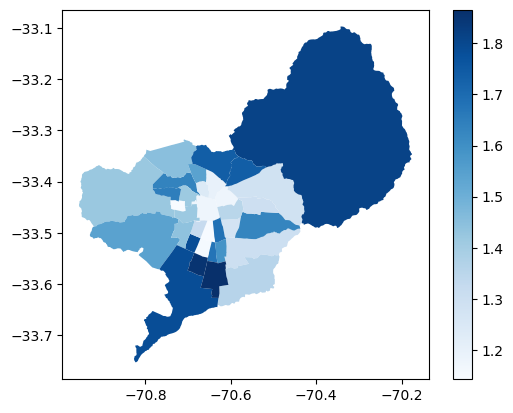

In [30]:
(viajes_with_comunas
 [['netapa', 'NOM_COMUNA', 'geometry']].groupby(['NOM_COMUNA', 'geometry'], sort=False).mean()
 .reset_index()
 .plot('netapa', cmap='Blues', legend=True)
 )

<Axes: >

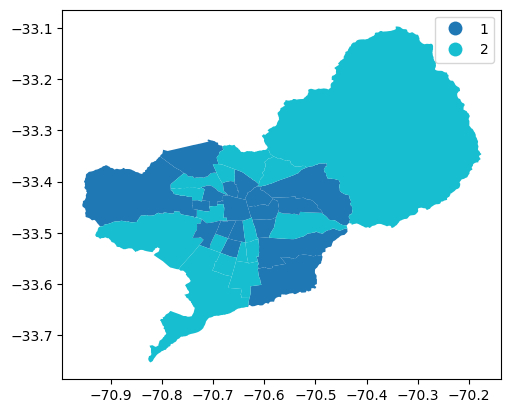

In [31]:
(viajes_with_comunas[viajes_with_comunas['proposito'] == 'TRABAJO']
 [['netapa', 'NOM_COMUNA', 'geometry']].dropna(subset=['netapa']).groupby(['NOM_COMUNA', 'geometry'], sort=False).agg(pd.Series.mode)
 .reset_index()
 .plot('netapa', 
       #cmap='Reds', 
       legend=True,
       categorical=True)
 )

<Axes: >

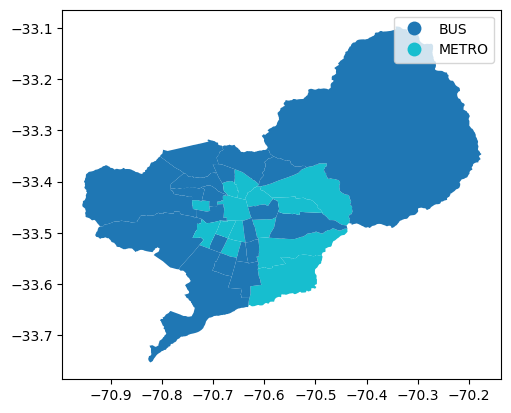

In [32]:
(viajes_with_comunas[viajes_with_comunas['proposito'] == 'TRABAJO']
 [['tipotransporte_1era', 'NOM_COMUNA', 'geometry']].groupby(['NOM_COMUNA', 'geometry'], sort=False).agg(pd.Series.mode)
 .reset_index()
 .plot('tipotransporte_1era', 
       #cmap='Reds', 
       legend=True,
       categorical=True)
 )

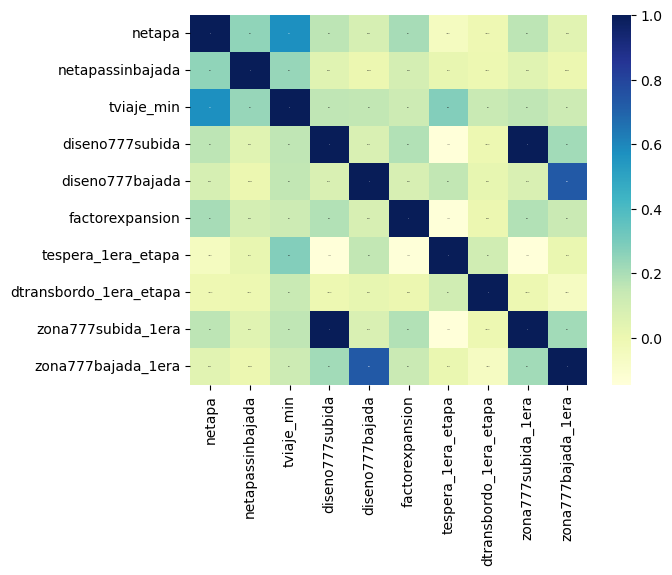

In [33]:
import seaborn as sb
dataplot = sb.heatmap(viajes_with_comunas[['netapa', 'netapassinbajada', 'tviaje_min', 'diseno777subida', 'diseno777bajada', 'factorexpansion', 'tespera_1era_etapa', 'dtransbordo_1era_etapa', 'zona777subida_1era', 'zona777bajada_1era']].corr(), cmap="YlGnBu", annot=True, annot_kws={"fontsize":0.5})

## Etapas

In [7]:
etapas_sample.head()

,op,netapa,tipo_dia,tipo_transporte,f_exp_servicioperiodots,tiene_bajada,tiempo2,tiempo_subida,tiempo_bajada,tiempo_etapa,...,comuna_subida,comuna_bajada,zona_subida,zona_bajada,sitio_subida,fexpansionzonaperiodots,tesperamediaintervalo,periodosubida,periodobajada,tiempoiniexpedicion
0,6,2,LABORAL,ZP,1.5277,1,2022-08-12 07:41:18.000,2022-08-12 07:41:07.000,2022-08-12 07:48:59.000,461.0,...,LAS CONDES,LAS CONDES,222.0,218.0,WA-9787,1.3223,0.1833,004 - PUNTA MAÃANA,004 - PUNTA MAÃANA,2022-08-12 06:00:48
1,6,1,LABORAL,BUS,1.0693,1,2022-08-12 18:26:32.000,2022-08-12 18:26:32.000,2022-08-12 18:37:41.000,669.0,...,LAS CONDES,LAS CONDES,210.0,207.0,CJRK-78,1.1608,0.5667,009 - PUNTA TARDE 1,010 - PUNTA TARDE 2,2022-08-12 18:08:10
2,1,2,LABORAL,METRO,1.0000,0,2022-08-12 18:41:56.000,2022-08-12 18:41:56.000,NaN,NaN,...,LAS CONDES,NaN,213.0,NaN,Manquehue - L1,NaN,NaN,010 - PUNTA TARDE 2,NaN,2010-01-00 -
3,1,1,LABORAL,METRO,1.0000,1,2022-08-12 18:42:01.000,2022-08-12 18:42:01.000,2022-08-12 19:11:34.000,1773.0,...,LAS CONDES,SANTIAGO,213.0,295.0,Manquehue - L1,1.2832,NaN,010 - PUNTA TARDE 2,010 - PUNTA TARDE 2,2010-01-00 -
4,1,1,LABORAL,METRO,1.0000,0,2022-08-12 17:38:52.000,2022-08-12 17:38:52.000,NaN,NaN,...,LA CISTERNA,NaN,380.0,NaN,La Cisterna L2,NaN,NaN,009 - PUNTA TARDE 1,NaN,2010-01-00 -


In [8]:
etapas_sample.columns

Index(['op', 'netapa', 'tipo_dia', 'tipo_transporte',
       'f_exp_servicioperiodots', 'tiene_bajada', 'tiempo2', 'tiempo_subida',
       'tiempo_bajada', 'tiempo_etapa', 'mh_subida', 'mh_bajada', 'x_subida',
       'y_subida', 'x_bajada', 'y_bajada', 'dist_ruta_paraderos',
       'dist_eucl_paraderos', 'servicio_subida', 'servicio_bajada',
       'par_subida', 'par_bajada', 'comuna_subida', 'comuna_bajada',
       'zona_subida', 'zona_bajada', 'sitio_subida', 'fexpansionzonaperiodots',
       'tesperamediaintervalo', 'periodosubida', 'periodobajada',
       'tiempoiniexpedicion'],
      dtype='object')

<Axes: >

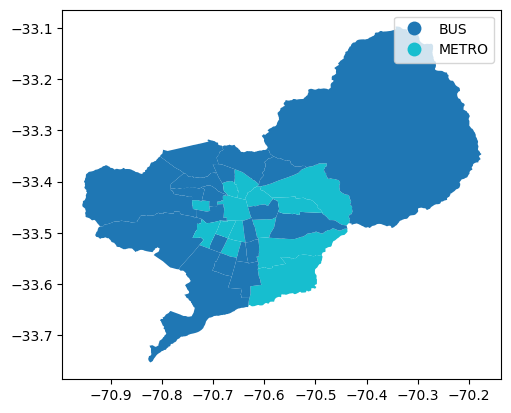

In [35]:
(viajes_with_comunas[viajes_with_comunas['proposito'] == 'TRABAJO']
 [['tipotransporte_1era', 'NOM_COMUNA', 'geometry']].groupby(['NOM_COMUNA', 'geometry'], sort=False).agg(pd.Series.mode)
 .reset_index()
 .plot('tipotransporte_1era', 
       #cmap='Reds', 
       legend=True,
       categorical=True)
 )

(<matplotlib.contour.QuadContourSet at 0x7fe290241d30>, None)

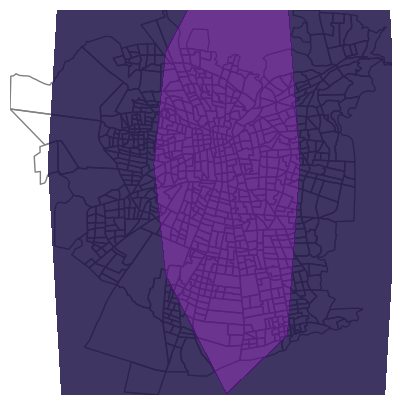

In [36]:
from aves.features.geo import to_point_geodataframe
from aves.visualization.maps import heat_map
from aves.visualization.figures import figure_from_geodataframe

subida_etapas = to_point_geodataframe(
    etapas_sample.dropna(subset=["x_subida", "y_subida"]),
    "x_subida",
    "y_subida",
    crs="epsg:5361",
)

zones.crs = "EPSG:4326"
zones_utm = zones.to_crs(subida_etapas.crs)

fig, ax = figure_from_geodataframe(zones_utm)

zones_utm.plot(ax=ax, color="none", edgecolor="grey")
# "EPSG:4326"
heat_map(
    ax,
    subida_etapas,
    #weight="Bajadas día Laboral por parada",
    bandwidth=10,
    n_levels=7,
    kernel="gaussian",
    low_threshold=0.01,
    alpha=0.85,
)


## Caracterización de Zonas

In [37]:
dic_zonas = pd.read_excel('Matrices-OD/DIC_777.xlsx', 'DIC_777')
dic_zonas.head()

,parada/est.metro,Subidas día laboral por parada,Bajadas día Laboral por parada,comuna,Referencia,diseno_777,x,y
0,L-13-16-PO-5,135.923308,28.696320,MAIPÚ,ING. E. DOMíNGUEZ / CAMINO LA FARFANA,0,335889,6292782
1,L-13-36-NS-7,84.998748,147.780780,MAIPÚ,LLANQUILEF / ING. EDUARDO DOMíNGUEZ,0,334219,6292589
2,L-13-36-SN-17,149.094310,42.062622,MAIPÚ,ILIHUE / ING. EDUARDO DOMíNGUEZ,0,334281,6292830
3,L-13-31-OP-5,2.020496,62.258092,MAIPÚ,LICANRAY / EL ROSAL,0,334732,6292745
4,L-13-31-SN-10,126.657184,8.758270,MAIPÚ,LICANRAY / EL ROSAL,0,334731,6292721


<Axes: >

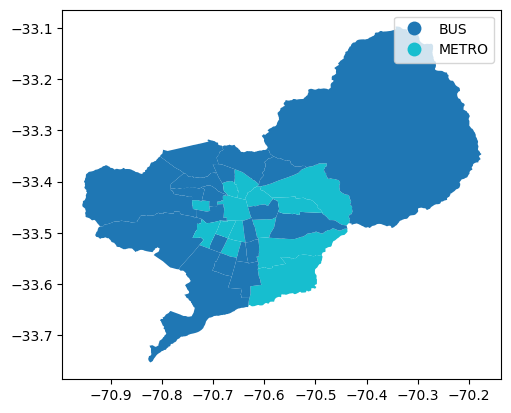

In [40]:
(viajes_with_comunas[viajes_with_comunas['proposito'] == 'TRABAJO']
 [['tipotransporte_1era', 'NOM_COMUNA', 'geometry']].groupby(['NOM_COMUNA', 'geometry'], sort=False).agg(pd.Series.mode)
 .reset_index()
 .plot('tipotransporte_1era', 
       #cmap='Reds', 
       legend=True,
       categorical=True)
 )

(<matplotlib.contour.QuadContourSet at 0x7fe29bcf7610>, None)

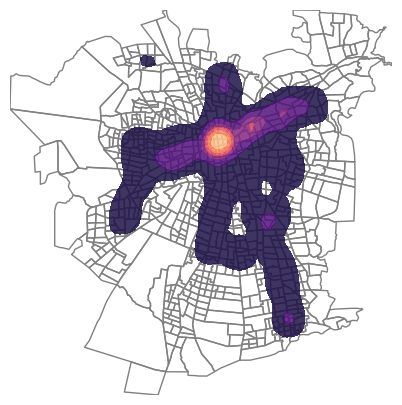

In [38]:
from aves.features.geo import to_point_geodataframe
from aves.visualization.maps import heat_map
from aves.visualization.figures import figure_from_geodataframe

paraderos = to_point_geodataframe(
    dic_zonas,
    "x",
    "y",
    crs="epsg:5361",
).dropna(subset=["Bajadas día Laboral por parada"])

zones.crs = "EPSG:4326"
zones_utm = zones.to_crs(paraderos.crs)

fig, ax = figure_from_geodataframe(zones_utm)

zones_utm.plot(ax=ax, color="none", edgecolor="grey")
# "EPSG:4326"
heat_map(
    ax,
    paraderos,
    weight="Bajadas día Laboral por parada",
    bandwidth=1000,
    n_levels=7,
    kernel="gaussian",
    low_threshold=0.05,
    alpha=0.85,
)


<Axes: >

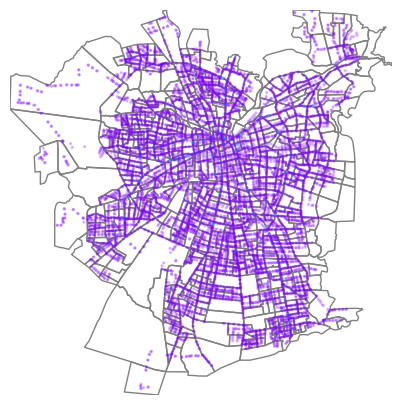

In [39]:
fig, ax = figure_from_geodataframe(zones_utm)

zones_utm.plot(ax=ax, color="none", edgecolor="grey")
paraderos.plot(column = "Bajadas día Laboral por parada",
               ax=ax,
               cmap = "rainbow",
               alpha = 0.2,
               markersize = 2)


In [41]:
zones_utm

,geometry
0,"POLYGON ((336393.040 6301612.355, 336333.612 6..."
1,"POLYGON ((338231.089 6304126.183, 338481.794 6..."
2,"POLYGON ((356697.250 6286889.357, 356758.233 6..."
3,"POLYGON ((356697.250 6286889.357, 356547.925 6..."
4,"POLYGON ((334098.257 6284662.630, 333090.571 6..."
...,...
799,"POLYGON ((336812.135 6307224.735, 337284.802 6..."
800,"POLYGON ((337284.802 6307317.425, 337532.248 6..."
801,"POLYGON ((337532.248 6307408.980, 337202.048 6..."
802,"POLYGON ((338346.031 6307687.571, 338460.682 6..."


In [46]:
viajes_with_comunas['zona777subida_1era']
viajes_with_comunas['diseno777subida'].head()

0    206.0
1    206.0
2    206.0
3    206.0
4    206.0
Name: diseno777subida, dtype: float64

In [48]:
viajes_sample.isna().all()

nviaje                    False
netapa                    False
etapas                     True
netapassinbajada          False
ultimaetapaconbajada      False
                          ...  
escolar                    True
tviaje_en_vehiculo_min    False
tipo_corte_etapa_viaje    False
proposito                 False
dviajeenbus                True
Length: 103, dtype: bool

In [49]:
pd.unique(viajes_sample['escolar'])

array([nan])